In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings


FINAL REPORT :

 CAN BE DROPPED:
    CASE_ID ( IT IS AN ID)
    REQUIRES_JOB_TRAINING ( PROVED FROM CHI SQUARE TEST AND STATS)

OUTLIERS:
    NO_OF_EMPLOYEES  (from boxplot)
    PREVAILING_WAGE  (from boxplot)


CONTINENT COLUMNS HAVE FEW UNIQUE VALUES WITH LESS COUNT.

TARGET COLUMN CASE_STATUS IS IMBALANCED



In [4]:
df=pd.read_csv("EasyVisa.csv")


In [9]:
df.info() #datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


extracting number of numerical and categorical features

In [7]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!="O"]
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]

print("number of numerical features is {} : {}".format(len(numeric_features),numeric_features))
print("number of categorical features is {} : {}".format(len(categorical_features),categorical_features))

number of numerical features is 3 : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
number of categorical features is 9 : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [ ]:
#to get the percentages of each columns
for col in categorical_features: 
    print(df[col].value_counts(normalize=True)*100) #convert the 0-1 values into percentage
    print("-------------------------------------------------------------------------")

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV13       0.003925
EZYV12       0.003925
EZYV11       0.003925
EZYV10       0.003925
EZYV09       0.003925
Name: proportion, Length: 25480, dtype: float64
-------------------------------------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-------------------------------------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-------------------------------------------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------------------------

univariate analysis 

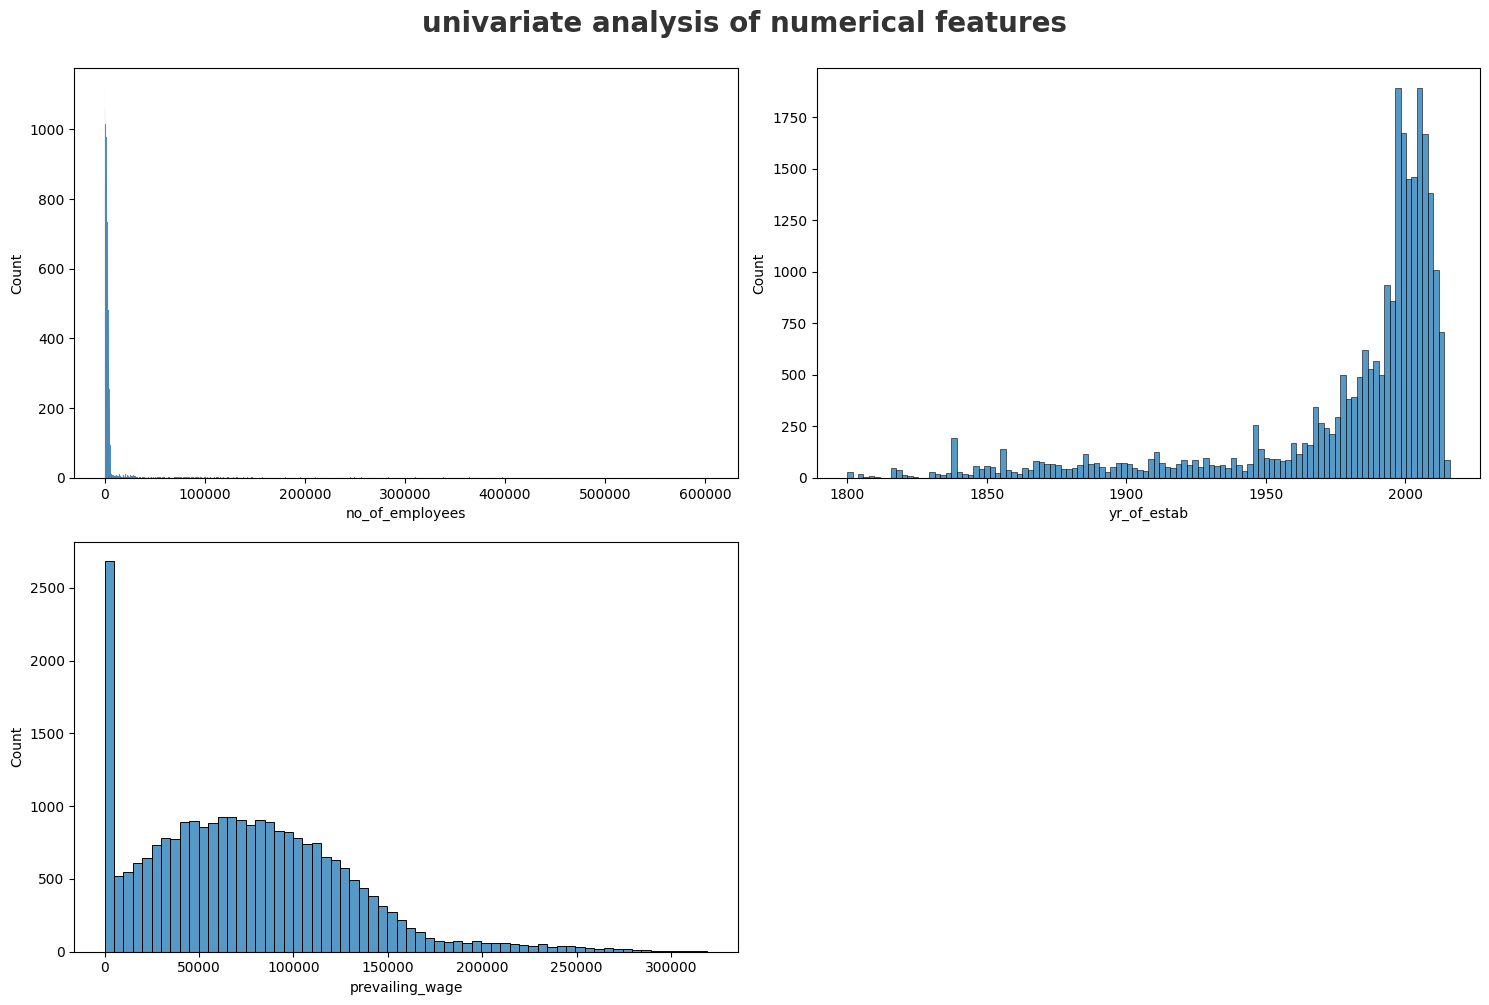

In [14]:
#to analyze each columns (single)

plt.figure(figsize=(15,10))
plt.suptitle("univariate analysis of numerical features",fontsize=20,fontweight="bold",alpha=0.8,y=1)

for i in range(0,len(numeric_features)):
    plt.subplot(2,2,i+1)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    sns.histplot(df[numeric_features[i]])


In [15]:
categorical_features.remove("case_id") #irrelevant column


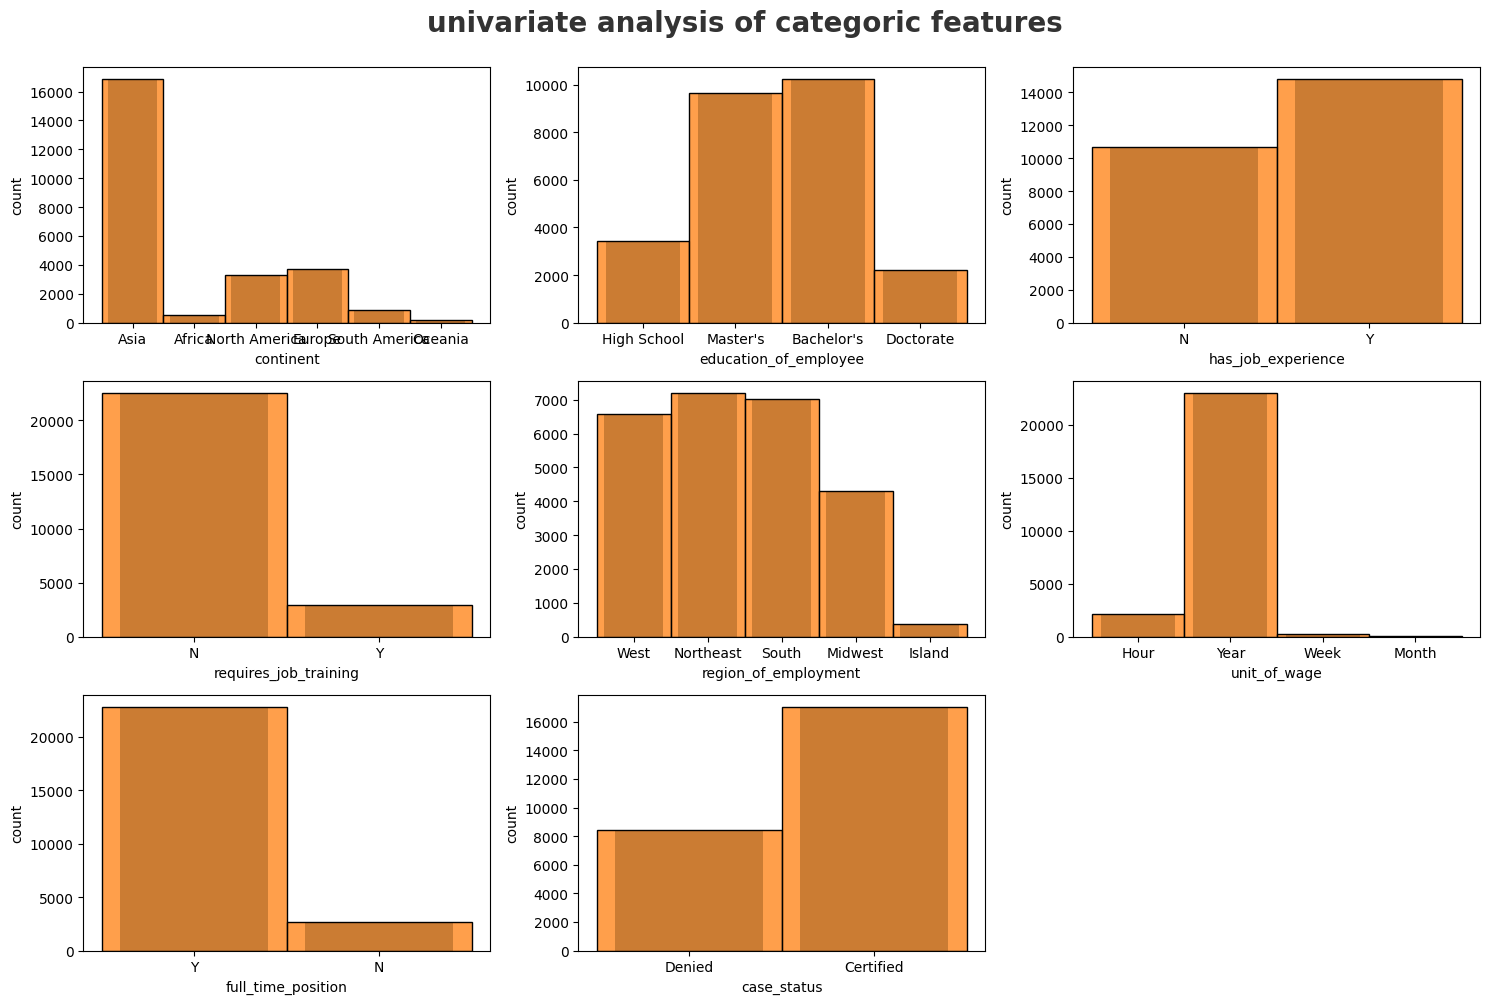

In [18]:
plt.figure(figsize=(15,10))
plt.suptitle("univariate analysis of categoric features",fontsize=20,fontweight="bold",alpha=0.8,y=1)

for i in range(0,len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    sns.histplot(df[categorical_features[i]])

In [8]:
#continuous and discrete features

discrete=[feature for feature in numeric_features if len(df[feature].unique())<=25]
continuous=[feature for feature in numeric_features if len(df[feature].unique())>25]

print("number of discrete features is {} : {}".format(len(discrete),discrete))
print("number of continuous features is {} : {}".format(len(continuous),continuous))


number of discrete features is 0 : []
number of continuous features is 3 : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


null hypothesis

In [ ]:
from scipy.stats import chi2_contingency 
chi2_test=[] 

for feature in categorical_features:
    if feature!="case_status":  #removing the target variable
        fvalue=chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1]
        if fvalue<0.05:
            chi2_test.append('reject null hypothesis (passed)')
        else:
            chi2_test.append("Failed to reject null hypothesis (failed )")
result=pd.DataFrame(data=[categorical_features,chi2_test]).T
result_columns=['Column','Hypothesis Result']
result 

,0,1
0,case_id,Failed to reject null hypothesis (failed )
1,continent,reject null hypothesis (passed)
2,education_of_employee,reject null hypothesis (passed)
3,has_job_experience,reject null hypothesis (passed)
4,requires_job_training,Failed to reject null hypothesis (failed )
5,region_of_employment,reject null hypothesis (passed)
6,unit_of_wage,reject null hypothesis (passed)
7,full_time_position,reject null hypothesis (passed)
8,case_status,None


In [12]:
df.isnull().sum()  #checking for null values , if any.

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

BOXPLOT AND VISUALIZING NUMERICAL FEATURES

C:\Users\sai\AppData\Local\Temp\ipykernel_26380\4031916485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="case_status",y=col,palette=clr1,ax=ax[i,0])
C:\Users\sai\AppData\Local\Temp\ipykernel_26380\4031916485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="case_status",y=col,palette=clr1,ax=ax[i,0])
C:\Users\sai\AppData\Local\Temp\ipykernel_26380\4031916485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="case_status",y=col,palette=clr1,ax=ax[i,0])


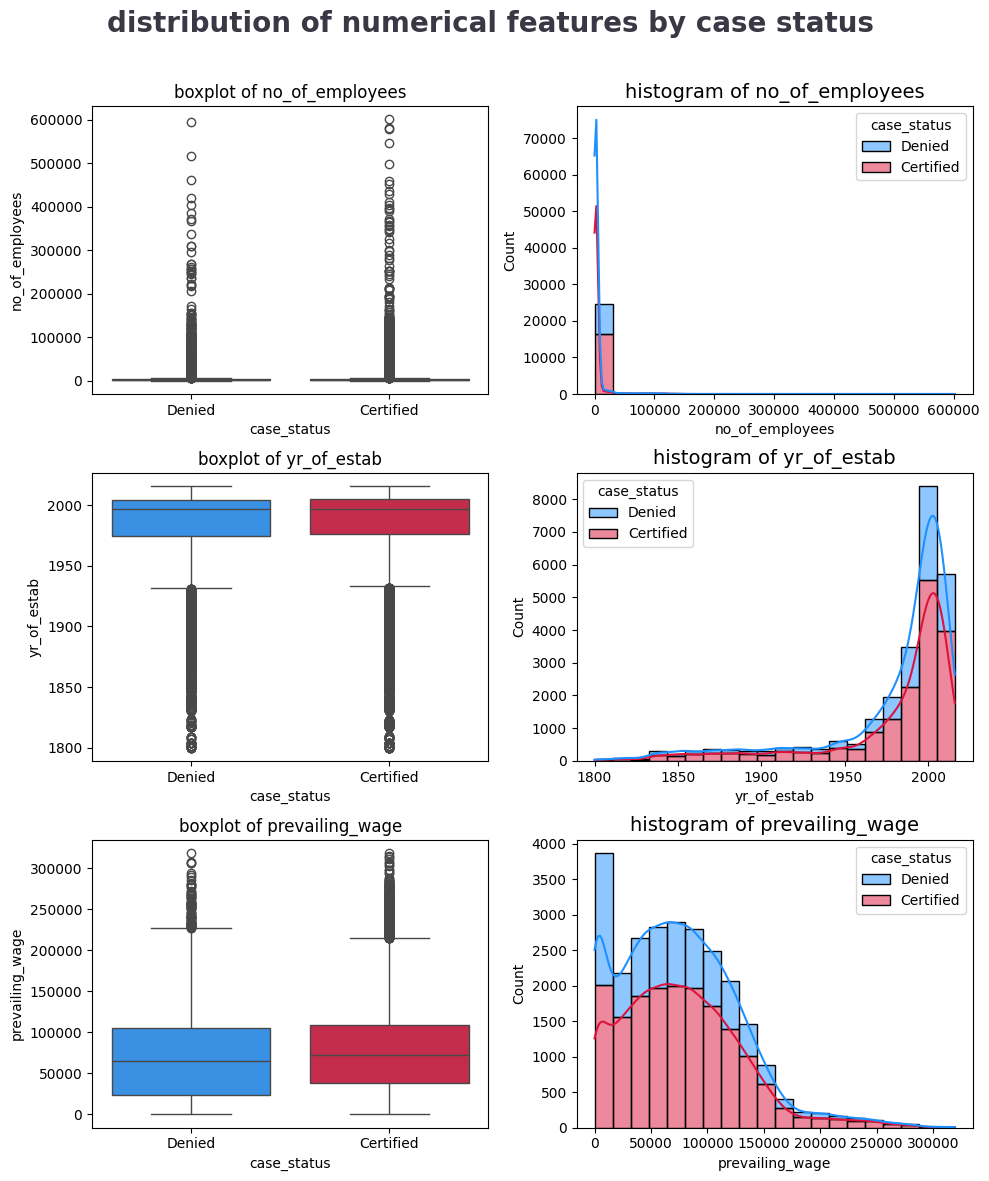

In [9]:
clr1=["#1E90FF","#DC143C"]
fig,ax=plt.subplots(3,2,figsize=(10,12))
fig.suptitle("distribution of numerical features by case status ", color="#3C3744",fontsize=20,fontweight="bold",ha="center")

for i,col in enumerate(continuous):
    sns.boxplot(data=df,x="case_status",y=col,palette=clr1,ax=ax[i,0])
    ax[i,0].set_title(f"boxplot of {col}",fontsize=12)
    sns.histplot(data=df,x=col,hue="case_status",bins=20,kde=True,multiple="stack",palette=clr1,ax=ax[i,1]) 
    ax[i,1].set_title(f"histogram of {col}",fontsize=14)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    

VISUALIZE TARGET FEATURE

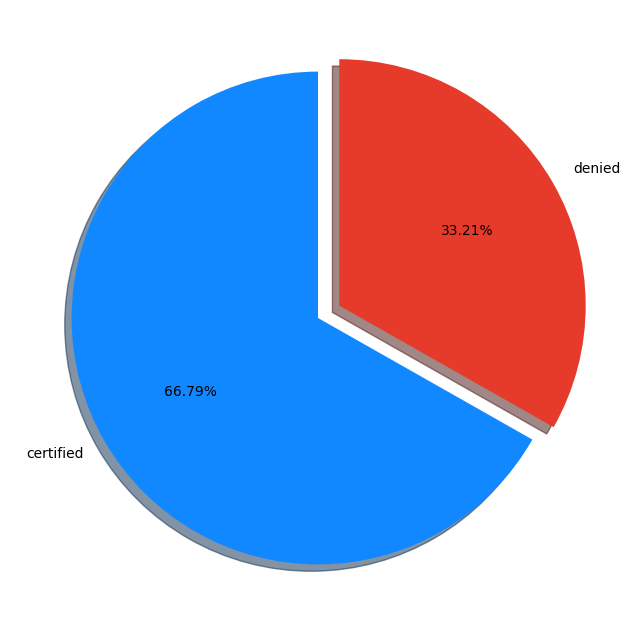

In [11]:
percentage = df.case_status.value_counts(normalize=True) * 100
labels = ['certified', 'denied']

fig, ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)
colors = ['#1188ff', '#e63a2a']

ax.pie(
    percentage,
    labels=labels,
    startangle=90,
    autopct="%1.2f%%",
    explode=explode,
    shadow=True,
    colors=colors
)

plt.show()


the target variable is imbalanced. 

STATS OF EACH COLUMNS WITH RESPECT TO THE TARGET VARIABLE

In [ ]:
# continent

df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100


proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

In [14]:
# EDUCATION

df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100


proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

In [15]:
# job experience

df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

In [16]:
# job training


df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

In [17]:
# wages


df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

In [ ]:
#prevailing wage

df.groupby('prevailing_wage')['case_status'].value_counts(normalize=True).to_frame()*100

,,proportion
prevailing_wage,case_status,
2.1367,Certified,100.0
2.9561,Denied,100.0
3.0031,Denied,100.0
3.3188,Denied,100.0
3.4889,Certified,100.0
...,...,...
311734.4900,Certified,100.0
314156.0600,Certified,100.0
315497.6000,Certified,100.0


In [19]:
#continents

df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100



proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150